In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from env import get_db_url
import wrangle
import sklearn.preprocessing
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
np.random.seed(123)

x = stats.skewnorm(7).rvs(1500) * 10 + 100
x = x.reshape(-1,1)


In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,parcelid
0,4,2.5,2490,691000,1969,7138.64,Orange,14381521
1,4,2.0,1808,241131,1980,3589.81,LA,11108702
2,4,2.0,1878,94598,1965,1415.77,LA,10728687
3,4,2.0,1207,380736,1964,3869.62,Orange,14376191
4,2,1.0,728,33497,1925,974.63,LA,12391744


In [4]:
# df = df.drop(columns=['fips'])

In [5]:
df

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,parcelid
0,4,2.5,2490,691000,1969,7138.64,Orange,14381521
1,4,2.0,1808,241131,1980,3589.81,LA,11108702
2,4,2.0,1878,94598,1965,1415.77,LA,10728687
3,4,2.0,1207,380736,1964,3869.62,Orange,14376191
4,2,1.0,728,33497,1925,974.63,LA,12391744
...,...,...,...,...,...,...,...,...
52437,3,2.0,1681,263964,1989,4189.90,LA,11189104
52438,5,4.0,2614,1726940,1929,20150.27,LA,11627263
52439,3,2.0,1472,260732,1980,2657.14,Orange,14476323
52440,3,2.0,1190,140428,1983,2638.37,LA,11238725


In [27]:
df = df.drop(columns=['fips'])

In [28]:
train, validate, test = wrangle.split_zillow_data(df)

In [29]:
train.shape, validate.shape, test.shape

((28993, 7), (12426, 7), (10355, 7))

In [30]:
x_train_and_validate, x_test = train_test_split(x,random_state=123)
x_train, x_validate = train_test_split(x_train_and_validate)

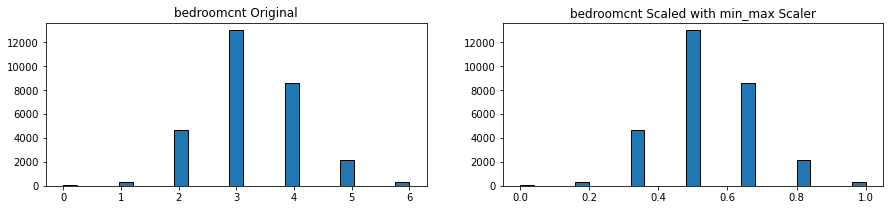

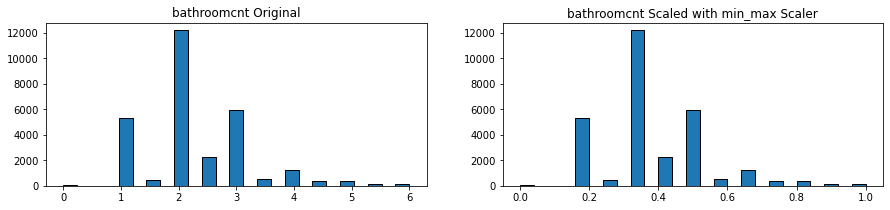

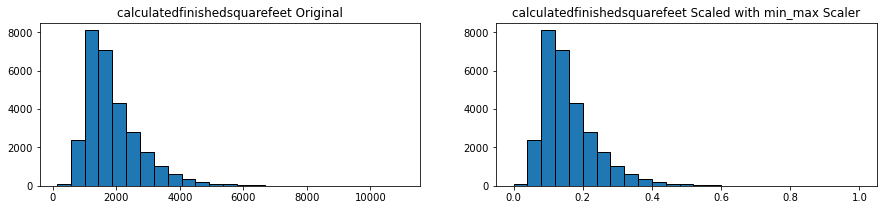

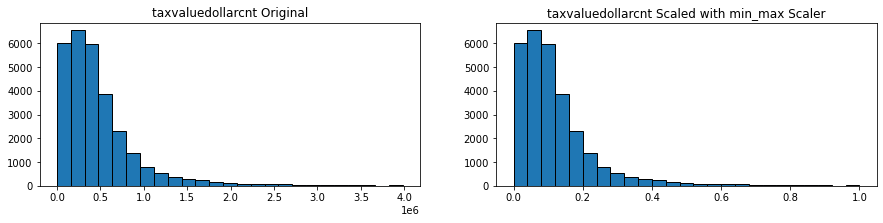

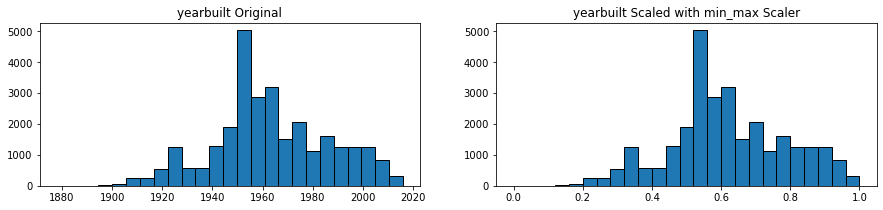

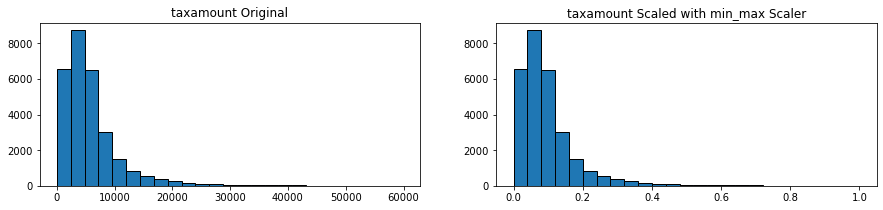

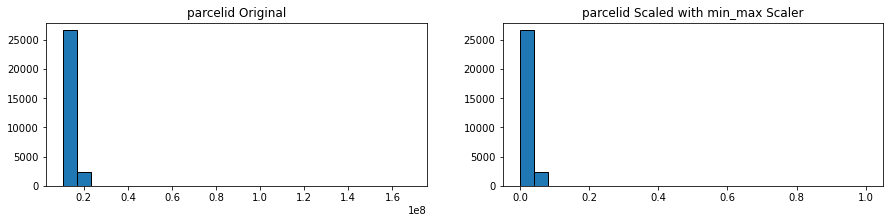

In [31]:
min_max_scaler = MinMaxScaler()

for column in train.columns:
    min_max_scaled = min_max_scaler.fit_transform(np.array(train[column]).reshape(-1,1))
    plt.figure(figsize=(15, 3))
    plt.subplot(121)
    plt.hist(train[column], ec='black', bins =25)
    plt.title(f'{column} Original')
    plt.subplot(122)
    plt.hist(min_max_scaled, ec='black', bins = 25)
    plt.title(f'{column} Scaled with min_max Scaler')
    plt.show()

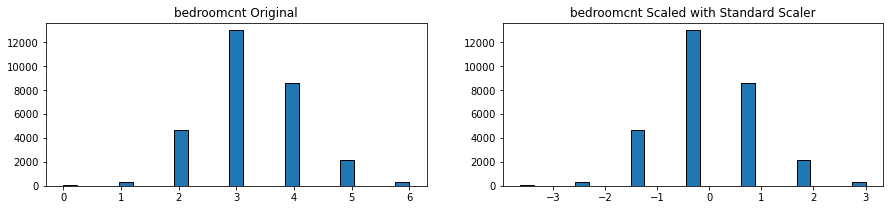

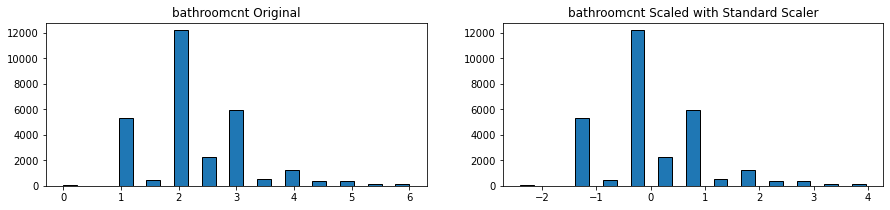

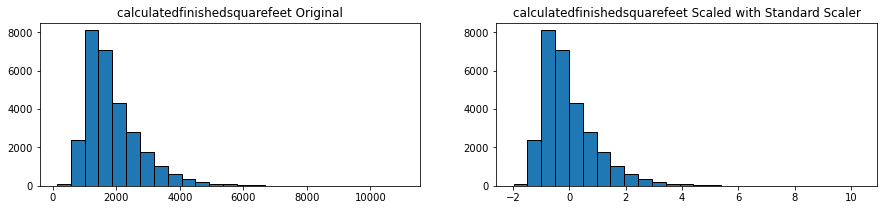

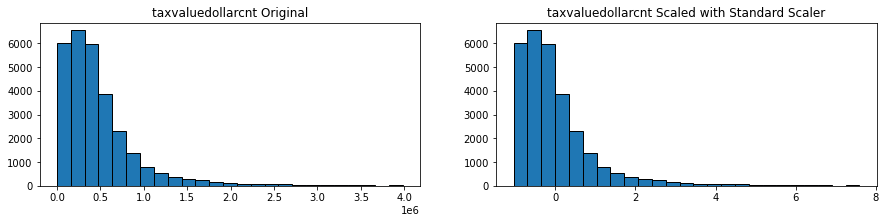

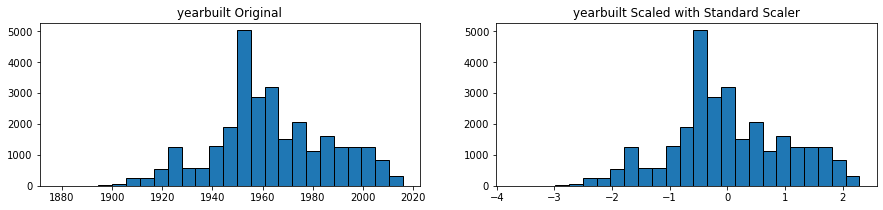

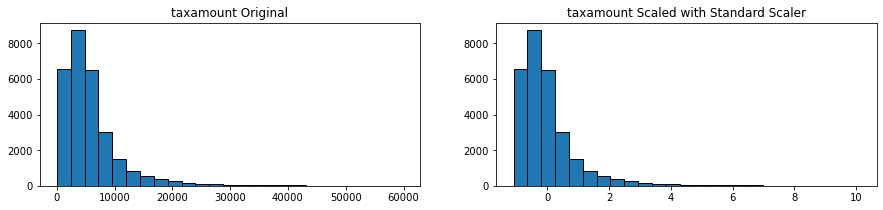

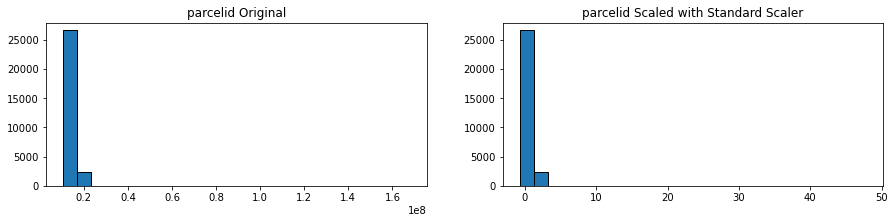

In [33]:
std_scaler = StandardScaler()

for column in train.columns:
    standard_scaled = std_scaler.fit_transform(np.array(train[column]).reshape(-1,1))
    plt.figure(figsize=(15, 3))
    plt.subplot(121)
    plt.hist(train[column], ec='black', bins =25)
    plt.title(f'{column} Original')
    plt.subplot(122)
    plt.hist(standard_scaled, ec='black', bins =25)
    plt.title(f'{column} Scaled with Standard Scaler')

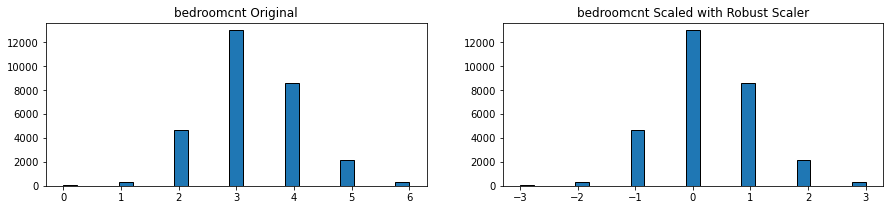

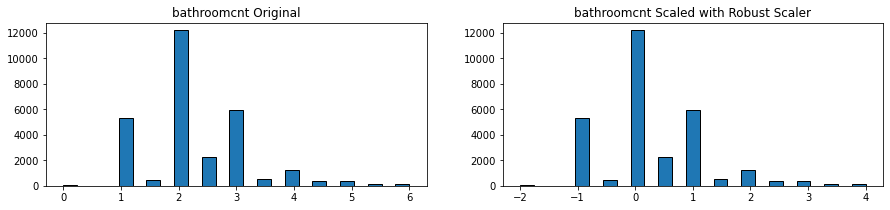

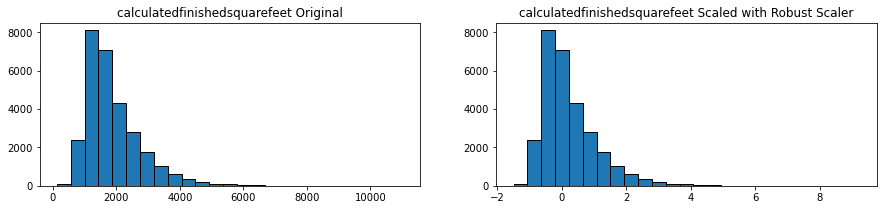

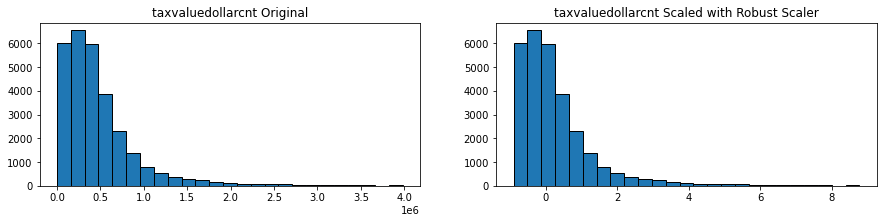

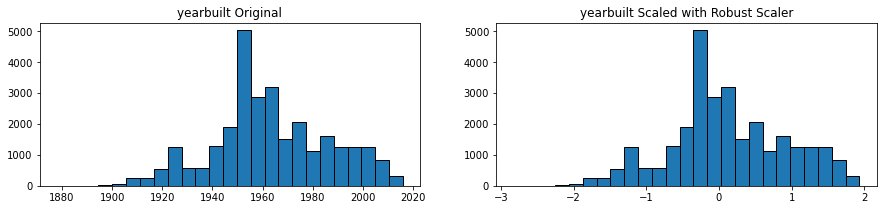

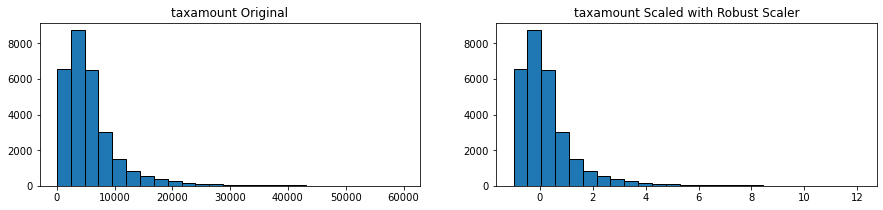

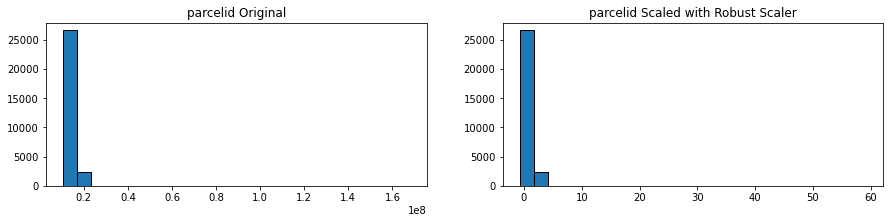

In [34]:
rob_scaler = RobustScaler()

for column in train.columns:
    robust_scaled = rob_scaler.fit_transform(np.array(train[column]).reshape(-1,1))
    plt.figure(figsize=(15, 3))
    plt.subplot(121)
    plt.hist(train[column], ec='black', bins =25)
    plt.title(f'{column} Original')
    plt.subplot(122)
    plt.hist(robust_scaled, ec='black', bins =25)
    plt.title(f'{column} Scaled with Robust Scaler')

# Exercise 2: Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

- the result is the same as the original

In [35]:
min_max_scaled

array([[0.04088535],
       [0.02137299],
       [0.01195936],
       ...,
       [0.00852573],
       [0.02020691],
       [0.00257487]])

In [36]:
min_max_scaler.inverse_transform(min_max_scaled)

array([[17127903.],
       [14065882.],
       [12588627.],
       ...,
       [12049796.],
       [13882893.],
       [11115944.]])

In [37]:
standard_scaled

array([[ 1.27833381],
       [ 0.33235431],
       [-0.12402824],
       ...,
       [-0.29049446],
       [ 0.27582177],
       [-0.57899831]])

In [38]:
std_scaler.inverse_transform(standard_scaled)

array([[17127903.],
       [14065882.],
       [12588627.],
       ...,
       [12049796.],
       [13882893.],
       [11115944.]])

In [39]:
robust_scaled

array([[ 1.73263541e+00],
       [ 5.64676700e-01],
       [ 1.20151689e-03],
       ...,
       [-2.04326910e-01],
       [ 4.94878487e-01],
       [-5.60529751e-01]])

In [40]:
rob_scalar.inverse_transform(robust_scaled)

NameError: name 'rob_scalar' is not defined

In [42]:
min_max_scaled_df = min_max_scaler.fit_transform(train)
pd.DataFrame(min_max_scaled_df).head()

,0,1,2,3,4,5,6
0,0.500000,0.333333,0.152773,0.119577,0.804348,0.086712,0.040885
1,0.833333,0.583333,0.355582,0.205494,0.789855,0.154036,0.021373
2,0.500000,0.333333,0.128535,0.024546,0.586957,0.029005,0.011959
3,0.666667,0.166667,0.122292,0.075219,0.231884,0.061757,0.013824
4,0.666667,0.333333,0.163055,0.415691,0.528986,0.330989,0.005958


In [43]:
pd.DataFrame(min_max_scaler.inverse_transform(min_max_scaled_df)).head()

,0,1,2,3,4,5,6
0,3.0,2.0,1792.0,477319.0,1989.0,5236.50,17127903.0
1,5.0,3.5,4001.0,819561.0,1987.0,9263.92,14065882.0
2,3.0,2.0,1528.0,98778.0,1959.0,1784.34,12588627.0
3,4.0,1.0,1460.0,300624.0,1910.0,3743.59,12881206.0
4,4.0,2.0,1904.0,1656855.0,1951.0,19849.65,11646891.0


In [44]:
# 3 quantile transform